In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
datafile = '../input/haberman.csv'

data = pd.read_csv(datafile,names=['age', 'year', 'nodes', 'status'])

### Initial Observations

In [59]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [60]:
data.shape

(306, 4)

In [61]:
list(data.columns)

['age', 'year', 'nodes', 'status']

In [62]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [63]:
data['status'].value_counts(normalize=True)

1    0.735294
2    0.264706
Name: status, dtype: float64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


#### Observations

- We have total of 306 datapoints and 3 independent features namely - age, year, node


- It is a classificaiton problem. Our objective is to determine 'status' feature value


- With almost 3/4 of the datapoints are from same status class, We can take that data is skewed


- There are no null values or any decimal values. All the features including target is given as integer values.


### Statistical Analysis


In [65]:
data.columns=['age', 'operation_year', 'aux_nodes', 'survival_status']

In [66]:
data.describe()

,age,operation_year,aux_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [67]:
from statsmodels import robust
robust.mad(data['aux_nodes'])

1.482602218505602

In [68]:
print('Percentile \t : Auxilary nodes at the percentile\n','-'*60)
for percentile, value in zip (np.arange(40,46), np.percentile(data['aux_nodes'], np.arange(40,46))):
    print(percentile,'\t\t : ', value)
for percentile, value in zip (np.arange(90,101), np.percentile(data['aux_nodes'], np.arange(90, 101))):
    print(percentile,'\t\t : ', value)

Percentile 	 : Auxilary nodes at the percentile
 ------------------------------------------------------------
40 		 :  0.0
41 		 :  0.0
42 		 :  0.0
43 		 :  0.0
44 		 :  0.0
45 		 :  1.0
90 		 :  13.0
91 		 :  14.0
92 		 :  14.600000000000023
93 		 :  15.650000000000034
94 		 :  18.69999999999999
95 		 :  19.75
96 		 :  21.80000000000001
97 		 :  22.849999999999966
98 		 :  23.899999999999977
99 		 :  29.899999999999977
100 		 :  52.0


#### Observations

- We can see age and operation_year have a spread of about 10.8 and 3.2 respectively. And the quantiles show they are almost regularly spaced.


- For aux_nodes, we can see that it is affected by outliers. 


    - From percentiles, we can see that last 2% is more than double that of 98%. 
    
    
    - Upto 44 percentile that datapoints are zeros


    - Also Standard deviation of the aux_nodes is more due to affect of outliers, Median abs deviation(MAD) is low which implies we have very few outliers. 
    
> Refresher : In the standard deviation, the distances from the mean are squared, so large deviations are weighted more heavily, and thus outliers can heavily influence it. In the MAD, the deviations of a small number of outliers are irrelevant. 


In [69]:
# changing Survival status to categorical object for plots
data['survival_status'] = data['survival_status'].map({1:'Yes', 2:'No'})

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
aux_nodes          306 non-null int64
survival_status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [71]:
data['survival_status'].value_counts()

Yes    225
No      81
Name: survival_status, dtype: int64

### Univariate analysis

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


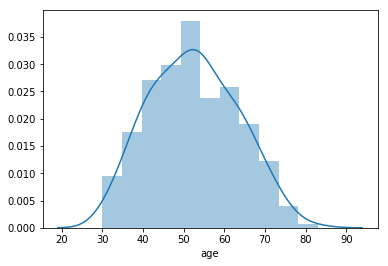

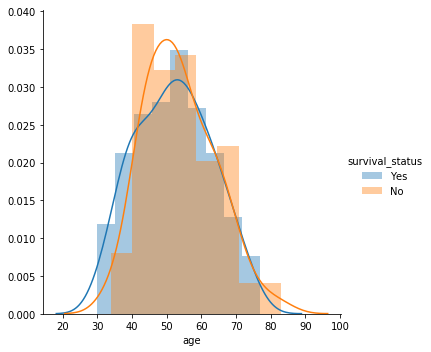

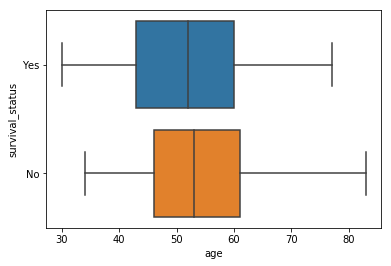

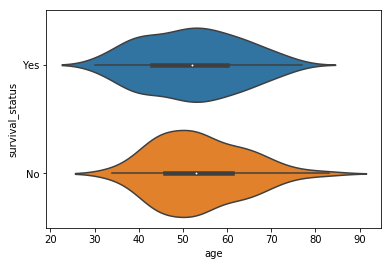

In [72]:
# Plots 3.1 to 3.4
sns.distplot(data['age'])
sns.FacetGrid(data, hue='survival_status', height = 5) \
    .map(sns.distplot, 'age') \
    .add_legend();
plt.show()

sns.boxplot(data['age'], data['survival_status'])
plt.show()
sns.violinplot(data['age'], data['survival_status'])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


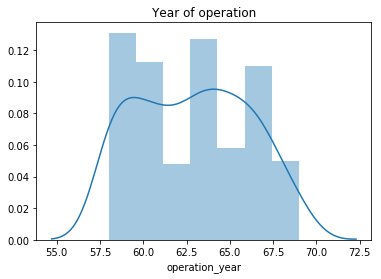

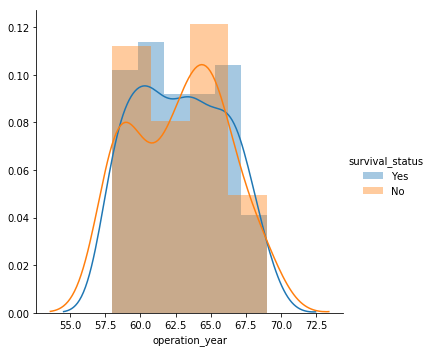

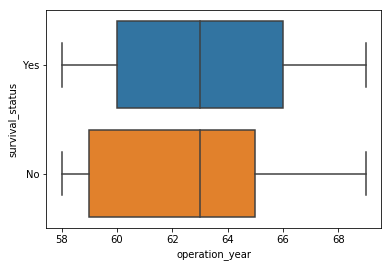

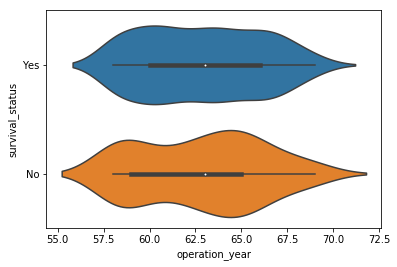

In [73]:
# Plots 3.5 to 3.8
plt.title('Year of operation')
sns.distplot(data['operation_year'])
sns.FacetGrid(data, hue='survival_status', height=5) \
    .map(sns.distplot, 'operation_year') \
    .add_legend()
plt.show()
sns.boxplot(data['operation_year'], data['survival_status'])
plt.show()
sns.violinplot(data['operation_year'], data['survival_status'])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


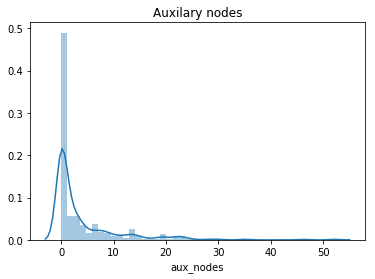

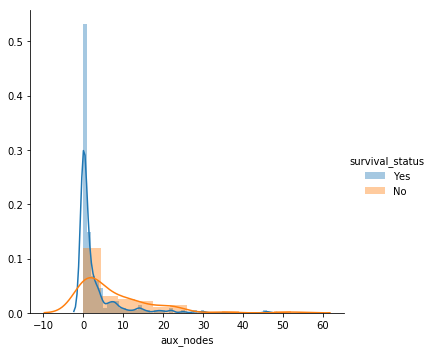

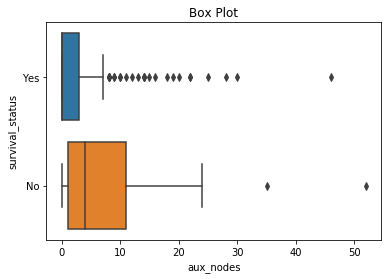

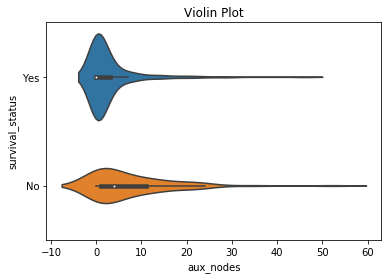

In [74]:
plt.title('Auxilary nodes')
sns.distplot(data['aux_nodes'])
sns.FacetGrid(data, hue='survival_status', height=5) \
    .map(sns.distplot, 'aux_nodes') \
    .add_legend();
plt.show()
sns.boxplot(data['aux_nodes'], data['survival_status']).set_title('Box Plot')
plt.show()
sns.violinplot(data['aux_nodes'], data['survival_status']).set_title('Violin Plot')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


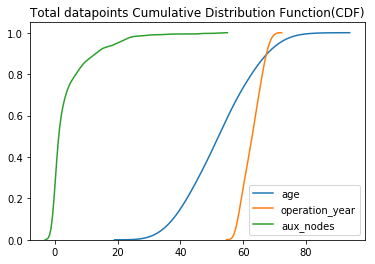

In [75]:
plt.title('Total datapoints Cumulative Distribution Function(CDF)')
for feature in ['age', 'operation_year', 'aux_nodes']:#data.columns[:-1]:
    sns.kdeplot(data[feature], cumulative=True)#.set_title('Cumulative Distribution Function(CDF)')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


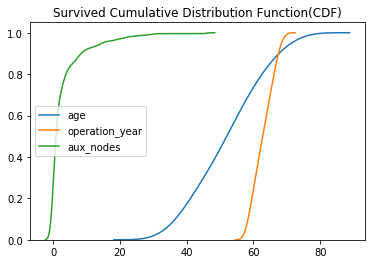

In [76]:
plt.title('Survived')
survived_data = data[data["survival_status"]=='Yes']
plt.title('Survived Cumulative Distribution Function(CDF)')
for feature in ['age', 'operation_year', 'aux_nodes']:
    sns.kdeplot(survived_data[feature], cumulative=True)#.set_title('Cumulative Distribution Function(CDF)')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


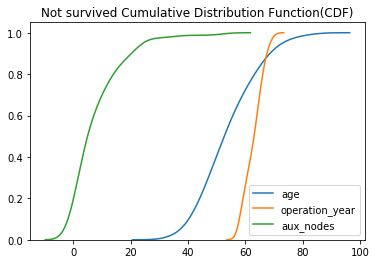

In [77]:
notsurvived_data = data[data["survival_status"]=='No']
plt.title('Not survived Cumulative Distribution Function(CDF)')
for feature in ['age', 'operation_year', 'aux_nodes']:#data.columns[:-1]:
    sns.kdeplot(notsurvived_data[feature], cumulative=True)#.set_title('Cumulative Distribution Function(CDF)')


#### Observations

- age seems to follow normal distribution.


- Auxilary nodes are very highly concentrated at 0 as can been seen from histograms. From CDF we can see that there is a very steep increase at around 0 and saturation after 20


- It can be observed that survival rate is more if auxilary nodes are less than 10


- People aged around 40-50 have have little chance of surviving


- Operations done around year '65 seems to have high non survival rates

### Bivariate Analysis

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


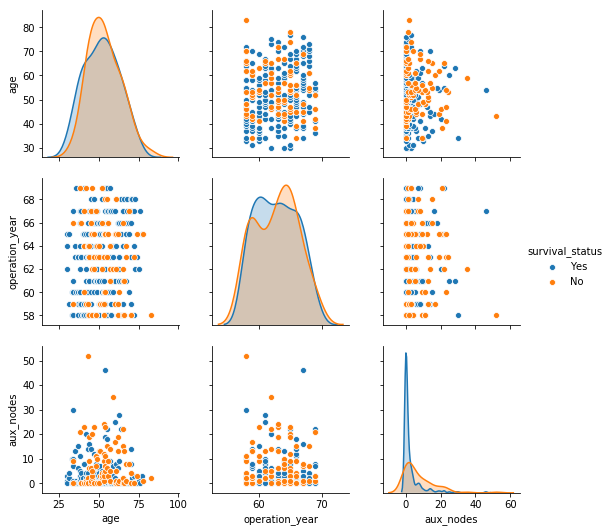

In [78]:
sns.pairplot(data, hue='survival_status')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


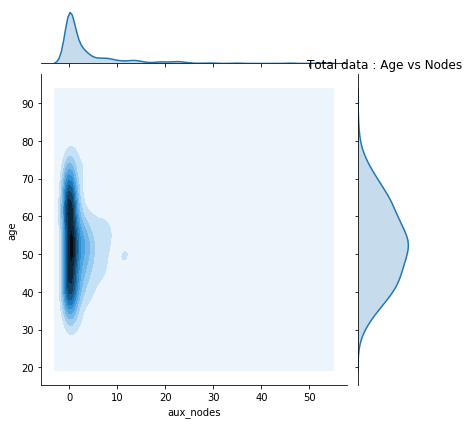

In [79]:
sns.jointplot(x='aux_nodes', y='age', data=data,kind='kde')
plt.title('Total data : Age vs Nodes')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


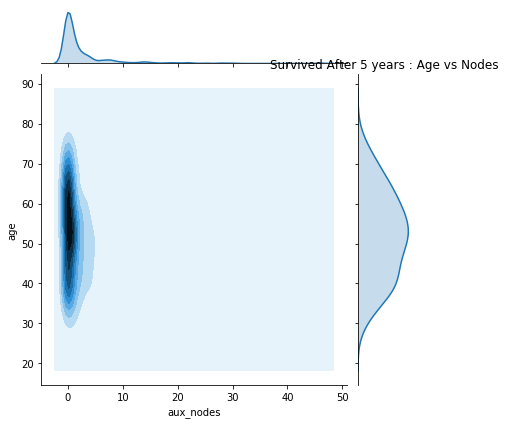

In [80]:
sns.jointplot(x='aux_nodes', y='age', data=survived_data,kind='kde')
plt.title('Survived After 5 years : Age vs Nodes')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


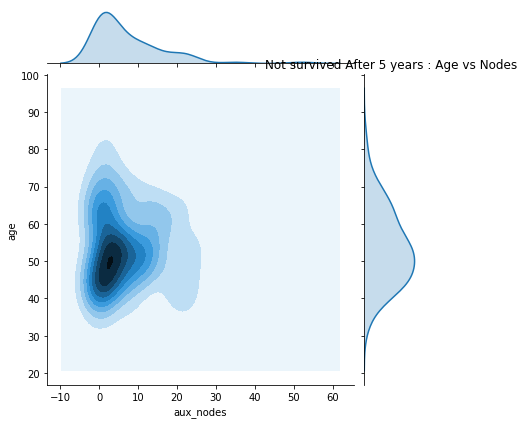

In [81]:
sns.jointplot(x='aux_nodes', y='age', data=notsurvived_data,kind='kde')
plt.title('Not survived After 5 years : Age vs Nodes')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


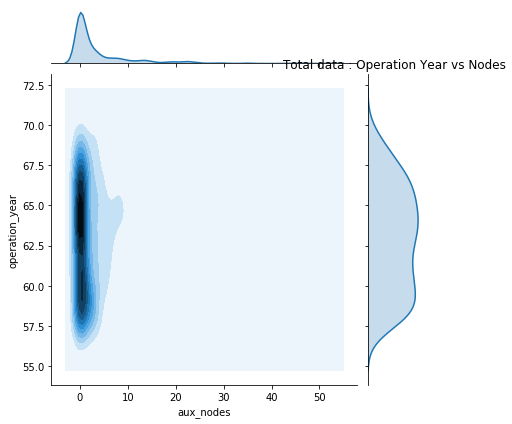

In [82]:
sns.jointplot(data['aux_nodes'], data['operation_year'],kind='kde')
plt.title('Total data : Operation Year vs Nodes')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


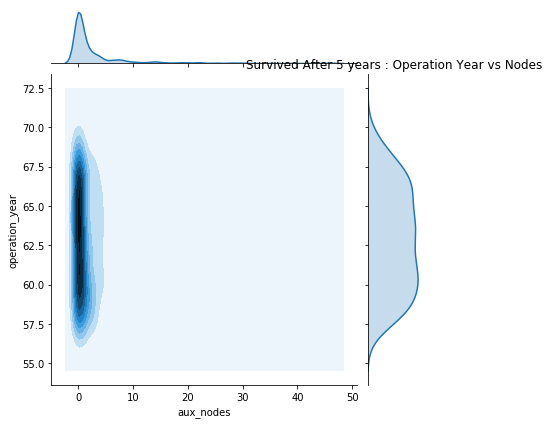

In [83]:
sns.jointplot(survived_data['aux_nodes'], survived_data['operation_year'],kind='kde')
plt.title('Survived After 5 years : Operation Year vs Nodes')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


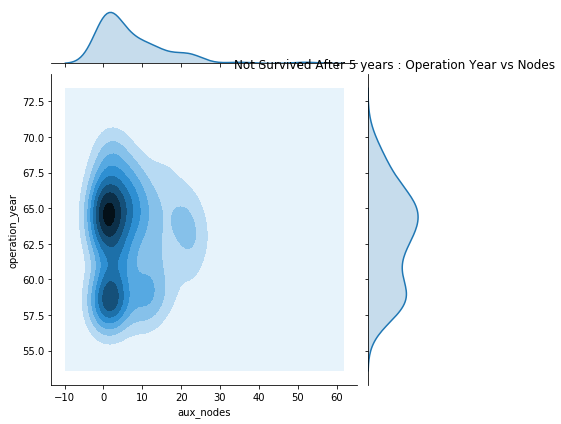

In [84]:
sns.jointplot(notsurvived_data['aux_nodes'], notsurvived_data['operation_year'],kind='kde')
plt.title('Not Survived After 5 years : Operation Year vs Nodes')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


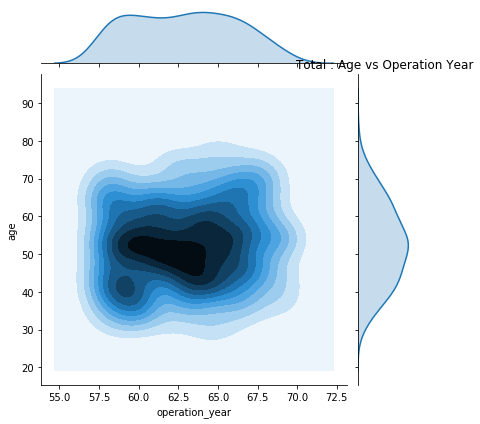

In [85]:
sns.jointplot(x='operation_year', y='age', data=data,kind='kde')
plt.title('Total : Age vs Operation Year')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


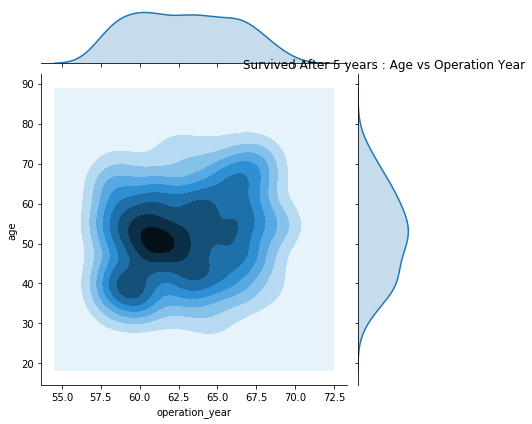

In [86]:
sns.jointplot(x='operation_year', y='age', data=survived_data,kind='kde')
plt.title('Survived After 5 years : Age vs Operation Year')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


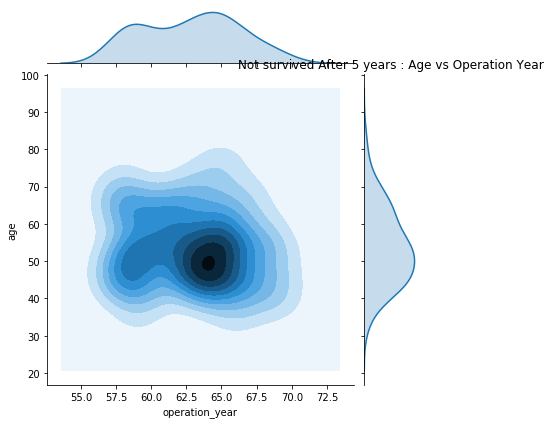

In [87]:
sns.jointplot(x='operation_year', y='age', data=notsurvived_data,kind='kde')
plt.title('Not survived After 5 years : Age vs Operation Year')
plt.show()

#### Observations

- age and operation year alone seem to have a little of impact on the survival status.


- Number of positive Auxilary nodes seems to be a key feature. 


- If the number is less than 10, chances of survival seems to be very high.(_from Plot : Total data - Age/Op. year vs Nodes_)


- It can observed that patients of age around 50 (40-60) years , seems to have more nodes than other age groups (_from Plot : Total data - Age vs Nodes_)


- Patients around age 50, with more nodes seems to have less chances of survival. (_from Plot : Not survived After 5 years : Age vs Nodes_)



- It is peculiar to note that operations have been more successful around 1960 than that of 1965. (_from Plots : Age vs Op. year_ ) 

       - It could also be because patients with more postive nodes are from around 1965 as can be seen from plots of Op.year vs Nodes



### Conclusions

- Dataset is imbalanced and should be taken care (more skewed towards survived)


- No. of positive auxilary nodes seems to be a key feature, but it is affected by outliers


- People with less positive auxilary nodes seems high chances of survival.


- People around age 40-60 are likely to have more positive auxilary nodes, and therefore less likely to survive.


- Operations done around 1965 have more non survival rates.It should also noted that the people have more positive auxilary nodes around same time.

** As part of my course work for Applied AI course